In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data import

In [2]:
address="https://raw.githubusercontent.com/geniusai-research/interns_task/main/sampled_data2.csv"
data=pd.read_csv(address)
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


# Data Cleaning

In [3]:
data.isnull().any()

step        False
customer    False
age         False
gender      False
merchant    False
category    False
amount      False
fraud       False
dtype: bool

In [4]:
data.describe()

,amount,fraud
count,25200.000000,25200.000000
mean,174.212506,0.285714
std,501.116240,0.451763
min,0.000000,0.000000
25%,17.720000,0.000000
50%,36.340000,0.000000
75%,109.180000,1.000000
max,8329.960000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      25200 non-null  object 
 1   customer  25200 non-null  object 
 2   age       25200 non-null  object 
 3   gender    25200 non-null  object 
 4   merchant  25200 non-null  object 
 5   category  25200 non-null  object 
 6   amount    25200 non-null  float64
 7   fraud     25200 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
data.count()

step        25200
customer    25200
age         25200
gender      25200
merchant    25200
category    25200
amount      25200
fraud       25200
dtype: int64

# Data Visualizing

In [7]:
ds_cat=data.select_dtypes(include='object').copy()

In [8]:
ds_cat.head()

,step,customer,age,gender,merchant,category
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation


In [9]:
ds_cat['category'].unique()

array(['Transportation', 'Beauty&Wellness', 'Sports&Toys', 'Health',
       'Leisure', 'Groceries', 'HotelServices', 'Fashion', 'Travel',
       'OtherServices', 'Technology', 'Restaurants&Bars', 'Home',
       'Contents'], dtype=object)

In [10]:
len(ds_cat['category'].unique())

14

In [11]:
ds_cat['category'].nunique()

14

<AxesSubplot:xlabel='count', ylabel='category'>

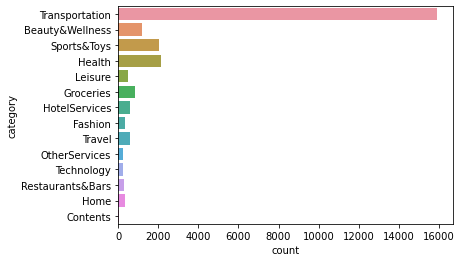

In [12]:
#frequency distribution
fig=plt.figure()
ax1=fig.add_subplot(111)
sns.countplot(data=ds_cat,y='category')

In [13]:
ds_cat['fraud'] =data.loc[ds_cat.index, 'fraud'].copy()

<AxesSubplot:xlabel='fraud', ylabel='category'>

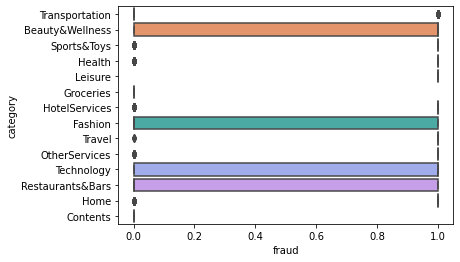

In [14]:
#boxplot
fig=plt.figure()
ax1=fig.add_subplot(111)
sns.boxplot(data=ds_cat,y='category',x='fraud')

#  LabelEncoder

In [15]:
X = data.drop(columns=['step','customer','fraud'])
y = data['fraud']

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical_names = {}
for feature in X.columns:
    X[feature] =  X[feature].fillna('') 
    le =  LabelEncoder()
    le.fit(X[feature])
    X[feature] = le.transform(X[feature])
    categorical_names[feature] = le.classes_

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [20]:
X

,age,gender,merchant,category,amount
0,2,2,16,12,1529
1,1,1,1,0,11457
2,1,1,28,12,4219
3,2,1,16,12,4016
4,2,2,28,12,4146
...,...,...,...,...,...
25195,3,1,16,12,3109
25196,2,1,32,4,10007
25197,7,1,16,12,236
25198,1,1,16,12,515


In [21]:
y

,fraud
0,0
1,1
2,0
3,0
4,0
...,...
25195,0
25196,1
25197,0
25198,0


# Training And Testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model =RandomForestRegressor()
model.fit(X_train,y_train)

<ipython-input-23-ccbc92393818>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor()

In [24]:
model.fit(X,y)

<ipython-input-24-4c1a2828403e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


RandomForestRegressor()

In [25]:
X_test

,age,gender,merchant,category,amount
6733,4,1,28,12,2995
8665,1,1,47,10,5838
19707,1,2,16,12,2990
15713,1,1,22,0,3092
14082,2,2,16,12,2663
...,...,...,...,...,...
14867,0,2,32,4,12433
18014,3,2,16,12,6198
6158,1,2,16,12,1929
8363,1,1,16,12,2323


In [26]:
y_test

,fraud
6733,0
8665,1
19707,0
15713,0
14082,0
...,...
14867,1
18014,0
6158,0
8363,0


In [27]:
model.score(X_test,y_test)

0.9844250642465843

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict_proba(X_test)
predictions_class = rf.predict(X_test)


<ipython-input-29-e85aeb1c94da>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [30]:
predictions

array([[1.  , 0.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.88, 0.12]])

In [31]:
predictions_class

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
if data['fraud'].nunique()> 0:
    rules_score = roc_auc_score(y_test, predictions[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, predictions[:,1])

print(rules_score)

0.9950589897992047


In [34]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
model.score(X_test,y_test)

0.8292899701470351

In [36]:
from sklearn.metrics import confusion_matrix ,accuracy_score, precision_score ,recall_score,f1_score

In [37]:
acc=accuracy_score(y_test,predictions_class)
preci=precision_score(y_test,predictions_class)
recal=recall_score(y_test,predictions_class)
f1_sc=f1_score(y_test,predictions_class)

In [38]:
acc

0.9670634920634921

In [39]:
preci

0.9365517241379311

In [40]:
recal

0.9483240223463687

In [41]:
f1_sc

0.9424011103400417

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions_class))
print(accuracy_score(y_test, predictions_class))

[[3516   92]
 [  74 1358]]
0.9670634920634921


In [43]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions_class)
print(cf_matrix)

[[3516   92]
 [  74 1358]]


<AxesSubplot:>

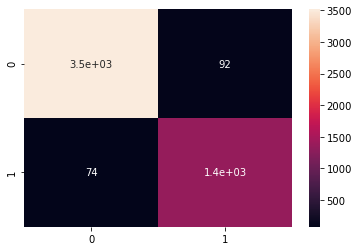

In [44]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)